In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sbn
import numpy as np 
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

# load results 

The results file can be generated using `scripts/agg_results.py`

In [14]:
res = pd.read_csv('../output/results.csv')
res = res.assign(name=[f'model={m}_rand={bool(r)}_cag={bool(ca)}' for m,r,ca in res[['model', 'randomize', 'cell_agnostic']].values ])
res[['exp', 'repl']] = res.EXP_ID.str.split(pat='-', expand=True)
res = res.assign(model2 = [m if r == 0 else m + '-rand' for m,r in res[['model', 'randomize']].values])
res.head()

,batch,cell_agnostic,channels,crit,data,device,dropout,epochs,gnn,ignore_cuda,...,r_flat_test,r_flat_val,time_elapsed,eval_at_epoch,EXP_ID,no_residual,name,exp,repl,model2
0,50.0,0.0,32.0,mse,../output/exp8-1//proc/,cuda,0.0,100.0,GIN,0.0,...,0.104799,0.103541,440.201324,20.0,exp8-1,NaN,model=gnn_rand=True_cag=False,exp8,1,gnn-rand
1,50.0,0.0,32.0,mse,../output/exp8-1//proc/,cuda,0.0,100.0,GIN,0.0,...,0.125788,0.131514,890.559509,40.0,exp8-1,NaN,model=gnn_rand=True_cag=False,exp8,1,gnn-rand
2,50.0,0.0,32.0,mse,../output/exp8-1//proc/,cuda,0.0,100.0,GIN,0.0,...,0.129913,0.132156,1339.002441,60.0,exp8-1,NaN,model=gnn_rand=True_cag=False,exp8,1,gnn-rand
3,50.0,0.0,32.0,mse,../output/exp8-1//proc/,cuda,0.0,100.0,GIN,0.0,...,0.128868,0.134752,1788.162109,80.0,exp8-1,NaN,model=gnn_rand=True_cag=False,exp8,1,gnn-rand
4,50.0,0.0,32.0,mse,../output/exp8-1//proc/,cuda,0.0,100.0,GIN,0.0,...,0.119382,0.119845,2237.689941,100.0,exp8-1,NaN,model=gnn_rand=True_cag=False,exp8,1,gnn-rand


In [15]:
order = np.sort(res.exp.unique())
order

array(['exp1', 'exp10', 'exp11', 'exp2', 'exp3', 'exp4', 'exp6', 'exp7',
       'exp8', 'exp9'], dtype=object)

# Use `val` set to choose best model within each experiment replicate

In [16]:
# metric which will choose "best" model (by max value)
metric = 'r_flat_val' #'r_cell_val' ##'mse_val' #'r2_val' # 'r_flat_val'
lower_is_better = False

In [17]:
bres = res[lambda x: ~x[metric].isna()].sort_values(metric, ascending=lower_is_better).drop_duplicates(['EXP_ID', 'model', 'randomize', 'cell_agnostic'])

bres.head()

,batch,cell_agnostic,channels,crit,data,device,dropout,epochs,gnn,ignore_cuda,...,r_flat_test,r_flat_val,time_elapsed,eval_at_epoch,EXP_ID,no_residual,name,exp,repl,model2
5276,256.0,1.0,124.0,mse,../output/exp10-3//proc/,cpu,0.00,100.0,NaN,0.0,...,0.539442,0.581048,427.859100,80.0,exp10-3,NaN,model=nn_rand=False_cag=True,exp10,3,nn
4471,256.0,1.0,32.0,mse,../output/exp10-1//proc/,cpu,0.00,100.0,NaN,0.0,...,0.550658,0.568264,457.734955,60.0,exp10-1,NaN,model=nn_rand=False_cag=True,exp10,1,nn
4331,50.0,0.0,10.0,mse,../output/exp10-1//proc/,cuda,0.25,100.0,NaN,0.0,...,0.512952,0.562395,3084.307861,60.0,exp10-1,0.0,model=gsnn_rand=False_cag=False,exp10,1,gsnn
5126,50.0,0.0,10.0,mse,../output/exp10-3//proc/,cuda,0.25,100.0,NaN,0.0,...,0.506893,0.558159,5173.685547,80.0,exp10-3,0.0,model=gsnn_rand=False_cag=False,exp10,3,gsnn
2414,256.0,1.0,124.0,mse,../output/exp10-2//proc/,cpu,0.00,100.0,NaN,0.0,...,0.590902,0.547054,757.201843,100.0,exp10-2,NaN,model=nn_rand=False_cag=True,exp10,2,nn


In [18]:
bres[lambda x: x.EXP_ID == 'exp10-1'][['EXP_ID', 'exp', 'model2', 'dir_name', 'uid', 'model', 'randomize', 'cell_agnostic', 'r_cell_test', 'r_flat_test', 'eval_at_epoch']].dropna() 

,EXP_ID,exp,model2,dir_name,uid,model,randomize,cell_agnostic,r_cell_test,r_flat_test,eval_at_epoch
4471,exp10-1,exp10,nn,a4f32441-86fd-4c30-948a-41b737d803ae/tb/169170...,a4f32441-86fd-4c30-948a-41b737d803ae,nn,0.0,1.0,-0.000551,0.550658,60.0
4331,exp10-1,exp10,gsnn,b71d4202-c27a-4b88-a500-c8cba076c92a/tb/169171...,b71d4202-c27a-4b88-a500-c8cba076c92a,gsnn,0.0,0.0,0.126176,0.512952,60.0
4498,exp10-1,exp10,nn,b4be8e14-1a9a-4f35-a942-53dcafdeb474/tb/169170...,b4be8e14-1a9a-4f35-a942-53dcafdeb474,nn,0.0,0.0,0.066549,0.487792,100.0
4238,exp10-1,exp10,gsnn-rand,2112da41-924a-4039-8ce5-13394611dba1/tb/169170...,2112da41-924a-4039-8ce5-13394611dba1,gsnn,1.0,0.0,0.034278,0.395366,100.0
4157,exp10-1,exp10,gnn,9d29717d-e60a-42eb-8efe-a91978ac8725/tb/169171...,9d29717d-e60a-42eb-8efe-a91978ac8725,gnn,0.0,0.0,0.022481,0.240376,80.0
4138,exp10-1,exp10,gnn-rand,63c4256a-6a63-437b-b6af-30a587dffd2b/tb/169171...,63c4256a-6a63-437b-b6af-30a587dffd2b,gnn,1.0,0.0,-0.008149,0.212986,100.0


In [19]:
bres[lambda x: x.exp == 'exp1'][['EXP_ID', 'exp', 'model2', 'dir_name', 'uid', 'model', 'randomize', 'cell_agnostic', 'r_cell_test', 'r_flat_test']][lambda x: x.model == 'gsnn']

,EXP_ID,exp,model2,dir_name,uid,model,randomize,cell_agnostic,r_cell_test,r_flat_test
6444,exp1-1,exp1,gsnn,ea2d2211-932a-4449-81fa-a419bca9a440/tb/169169...,ea2d2211-932a-4449-81fa-a419bca9a440,gsnn,0.0,0.0,0.008150,0.306816
9447,exp1-5,exp1,gsnn,848c19d0-cc9a-4def-9b9a-d089ceb2575e/tb/169219...,848c19d0-cc9a-4def-9b9a-d089ceb2575e,gsnn,0.0,0.0,0.020963,0.325349
8583,exp1-3,exp1,gsnn,80a32797-2b4e-4e11-935d-62461d60a5b6/tb/169169...,80a32797-2b4e-4e11-935d-62461d60a5b6,gsnn,0.0,0.0,0.054350,0.351784
5930,exp1-2,exp1,gsnn,e1279e20-e877-46a4-a123-e304bc658a07/tb/169168...,e1279e20-e877-46a4-a123-e304bc658a07,gsnn,0.0,0.0,0.050322,0.314203
6281,exp1-1,exp1,gsnn-rand,44f68786-695e-4d7b-be92-535e9525aa5b/tb/169169...,44f68786-695e-4d7b-be92-535e9525aa5b,gsnn,1.0,0.0,0.003575,0.060070
8680,exp1-3,exp1,gsnn-rand,c8be42d3-7e2c-42ed-a087-287c3772f862/tb/169169...,c8be42d3-7e2c-42ed-a087-287c3772f862,gsnn,1.0,0.0,0.004795,0.261119
5918,exp1-2,exp1,gsnn-rand,d9a5a642-175a-49f4-92a7-617a1900518c/tb/169169...,d9a5a642-175a-49f4-92a7-617a1900518c,gsnn,1.0,0.0,0.020526,0.233882
9243,exp1-5,exp1,gsnn-rand,26494023-b78a-4810-8663-fd38a7213571/tb/169220...,26494023-b78a-4810-8663-fd38a7213571,gsnn,1.0,0.0,0.009739,0.212154


In [20]:
order = [x for x in ['exp' + str(i) for i in range(12)] if x in bres.exp.unique()]
order

['exp1',
 'exp2',
 'exp3',
 'exp4',
 'exp6',
 'exp7',
 'exp8',
 'exp9',
 'exp10',
 'exp11']

# Paired T-Test Comparison

In [9]:
metric = 'r_cell_test'

print('\\begin{tabular}{|l|l|l|}')
print('\\hline')
print('EXP. ID & H0 & p-value \\\\ \\hline')

exps = np.sort(bres.exp.unique())

for i in range(12): 
    exp = f'exp{i}'
    if exp not in exps: continue 

    tmp = bres[lambda x: x.exp == exp]
    group1 = tmp[lambda x: (x.model == 'gsnn') & (x.randomize == 0)].sort_values(by='EXP_ID')
    exp_order1 = group1.EXP_ID.values
    score1 = group1[metric].values
    group2 = tmp[lambda x: (x.model == 'nn') & (x.cell_agnostic == 0)].sort_values(by='EXP_ID')
    exp_order2 = group2.EXP_ID.values
    score2 = group2[metric].values

    assert (exp_order1 == exp_order2).all(), 'orders do not match'

    ttest_res = ttest_rel(score1, score2, alternative='two-sided')

    if ttest_res.statistic < 0: 
        print(exp, '&', 'GSNN > NN &', f'{ttest_res.pvalue:.3f}', end='')
        #print(f'EXP: {exp} \t-->  NN performs better than GSNN [p-value: {ttest_res.pvalue:.2f}] || GSNN mean: {score1.mean():.2f} || NN mean {score2.mean():.2f}')
    else: 
        print(exp, '&', 'NN > GSNN &', f'{ttest_res.pvalue:.3f}', end='')
        #print(f'EXP: {exp} \t-->  GSNN performs better than NN [p-value: {ttest_res.pvalue:.2f}] || GSNN mean: {score1.mean():.2f} || NN mean {score2.mean():.2f}')

    if ttest_res.pvalue <= 0.05: 
        print('**\\\\ \\hline')
    else: 
        print('\\\\ \\hline')

print('\\end{tabular}')


\begin{tabular}{|l|l|l|}
\hline
EXP. ID & H0 & p-value \\ \hline
exp1 & NN > GSNN & 0.256\\ \hline
exp2 & GSNN > NN & 0.247\\ \hline
exp3 & NN > GSNN & 0.053\\ \hline
exp4 & NN > GSNN & 0.391\\ \hline
exp6 & NN > GSNN & 0.591\\ \hline
exp7 & NN > GSNN & 0.709\\ \hline
exp8 & NN > GSNN & 0.784\\ \hline
exp9 & NN > GSNN & 0.044**\\ \hline
exp10 & NN > GSNN & 0.024**\\ \hline
exp11 & NN > GSNN & 0.899\\ \hline
\end{tabular}


# Number of model parameters: GSNN vs NN

In [21]:
exps = np.sort(bres.exp.unique())


print('\\begin{tabular}{|l|l|l|l|}')
print('\\hline')
print('EXP. ID & Num. GSNN params (min, median, max) & Num. NN params (min, median, max) & Ratio of Median Num. params \\\\ \\hline')

rs = []
for i in range(12): 
    exp = f'exp{i}'
    if exp not in exps: continue 

    tmp = bres[lambda x: x.exp == exp]
    group1 = tmp[lambda x: (x.model == 'gsnn') & (x.randomize == 0)].sort_values(by='EXP_ID')
    exp_order1 = group1.EXP_ID.values
    score1 = group1[metric].values
    group2 = tmp[lambda x: (x.model == 'nn') & (x.cell_agnostic == 0)].sort_values(by='EXP_ID')
    exp_order2 = group2.EXP_ID.values
    score2 = group2[metric].values

    assert (exp_order1 == exp_order2).all(), 'orders do not match' 

    n1 = group1.n_params.median()
    n2 = group2.n_params.median()

    ratio_of_params_nn_vs_gsnn = n2 / n1
    rs.append(ratio_of_params_nn_vs_gsnn)

    print(exp, '&', f'{int(group1.n_params.min())}, {int(group1.n_params.median())}, {int(group1.n_params.max())}', '&', f'{int(group2.n_params.min())}, {int(group2.n_params.median())}, {int(group2.n_params.max())}', '&', f'{ratio_of_params_nn_vs_gsnn:.1f}', end=' \\\\ \\hline\n')

print('AVG.', '&', '', '&', '', '&', f'{np.mean(rs):.1f}', end=' \\\\ \\hline\n')

print('\\end{tabular}')


\begin{tabular}{|l|l|l|l|}
\hline
EXP. ID & Num. GSNN params (min, median, max) & Num. NN params (min, median, max) & Ratio of Median Num. params \\ \hline
exp1 & 21442, 49327, 49327 & 97316, 97316, 97316 & 2.0 \\ \hline
exp2 & 49171, 49171, 112491 & 38514, 38514, 160138 & 0.8 \\ \hline
exp3 & 60098, 60098, 139093 & 51788, 105324, 211224 & 1.8 \\ \hline
exp4 & 517674, 517674, 517684 & 118255, 468315, 468315 & 0.9 \\ \hline
exp6 & 343466, 343466, 343466 & 221315, 436055, 436055 & 1.3 \\ \hline
exp7 & 257516, 582246, 582256 & 435880, 435880, 850960 & 0.7 \\ \hline
exp8 & 280857, 280857, 280857 & 163209, 163209, 323349 & 0.6 \\ \hline
exp9 & 362646, 362646, 362656 & 332866, 665666, 665666 & 1.8 \\ \hline
exp10 & 191562, 191562, 191562 & 119660, 119660, 239000 & 0.6 \\ \hline
exp11 & 288580, 666300, 666310 & 552837, 1076877, 1076877 & 1.6 \\ \hline
AVG. &  &  & 1.2 \\ \hline
\end{tabular}


In [22]:
group1.n_params

3014     288580.0
3897     666310.0
10308    666300.0
Name: n_params, dtype: float64

# Computational Complexity of the GSNN method

In [36]:
exps = np.sort(bres.exp.unique())
exp_order = [f'exp{i}' for i in range(12) if f'exp{i}' in exps]


timeres = res.groupby(['exp', 'model'])[['time_elapsed']].median().reset_index().pivot(index='exp', columns='model', values='time_elapsed')
timeres = timeres.assign(**{'gnn (min)':lambda x: x.gnn/60, 'gsnn (min)':lambda x: x.gsnn/60, 'nn (min)':lambda x: x.nn/60})
timeres = timeres.assign(gsnn_div_nn = lambda x: x.gsnn / x.nn, gsnn_div_gnn= lambda x: x.gsnn / x.gnn)
timeres.loc[exp_order, ['gsnn (min)', 'gnn (min)', 'nn (min)', 'gsnn_div_nn', 'gsnn_div_gnn']]

for i,row in timeres.iterrows(): 
    print(' & '.join([str(f'{x:.1f}') for x in row.values]), end=' \\\\ \\hline\n')


742.540771484375 & 1371.2115478515625 & 374.7883911132813 & 12.375679524739583 & 22.853525797526043 & 6.2464731852213555 & 3.658628656502619 & 1.8466481579327207 \\ \hline
755.7991333007812 & 1957.0451049804688 & 357.8370819091797 & 12.596652221679687 & 32.617418416341145 & 5.963951365152995 & 5.469095305995072 & 2.589371988868945 \\ \hline
1646.5271606445312 & 6384.442138671875 & 444.3334503173828 & 27.442119344075522 & 106.40736897786458 & 7.405557505289713 & 14.368583175791816 & 3.8775200866851733 \\ \hline
805.5696105957031 & 1681.12646484375 & 571.5498657226562 & 13.426160176595053 & 28.0187744140625 & 9.525831095377605 & 2.941346968419225 & 2.086879200421413 \\ \hline
1719.5252075195312 & 4657.5517578125 & 822.4006042480469 & 28.658753458658854 & 77.62586263020833 & 13.706676737467449 & 5.66336130318275 & 2.708626624049998 \\ \hline
5037.0478515625 & 29263.55078125 & 1606.6615600585938 & 83.95079752604167 & 487.72584635416666 & 26.77769266764323 & 18.213886177859873 & 5.809663049

# GSNN vs NN vs GNN 

Exclude `cell_agnostic` and `randomize` terms. 

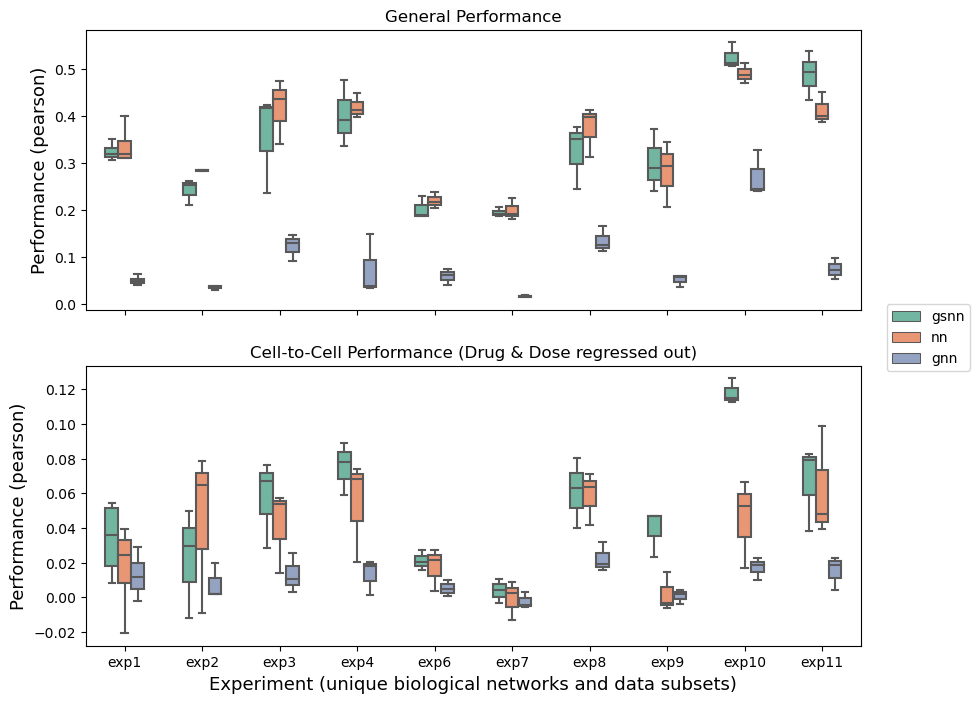

<Figure size 1000x500 with 0 Axes>

In [150]:
fontsize=13

f,axes = plt.subplots(2,1, figsize=(10,8), sharex=True)
g = sbn.boxplot(ax=axes.flat[0], x='exp', y='r_flat_test', hue='model2', data=bres[lambda x: (x.cell_agnostic.values == 0) & (x.randomize.values == 0.)], order=order, width=0.5, orient='v', palette=sbn.color_palette("Set2"))
g.legend(loc='right', bbox_to_anchor=(1.15, -0.1), ncol=1)
axes.flat[0].set_xlabel(None)
axes.flat[0].set_ylabel('Performance (pearson)', fontsize=fontsize)
axes.flat[0].set_title('General Performance')

f = plt.figure(figsize=(10,5))
g = sbn.boxplot(ax=axes.flat[1], x='exp', y='r_cell_test', hue='model2', data=bres[lambda x: (x.cell_agnostic.values == 0) & (x.randomize.values == 0.)], order=order, width=0.5, orient='v', palette=sbn.color_palette("Set2"))
axes.flat[1].get_legend().set_visible(False)
axes.flat[1].set_ylabel('Performance (pearson)', fontsize=fontsize)
axes.flat[1].set_xlabel('Experiment (unique biological networks and data subsets)', fontsize=fontsize)
axes.flat[1].set_title('Cell-to-Cell Performance (Drug & Dose regressed out)')

plt.tight_layout()
plt.show()

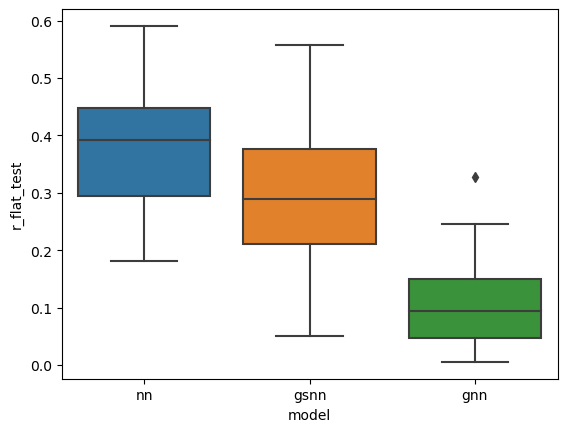

In [132]:
plt.figure()
sbn.boxplot(x='model', y='r_flat_test', data=bres)
plt.show()

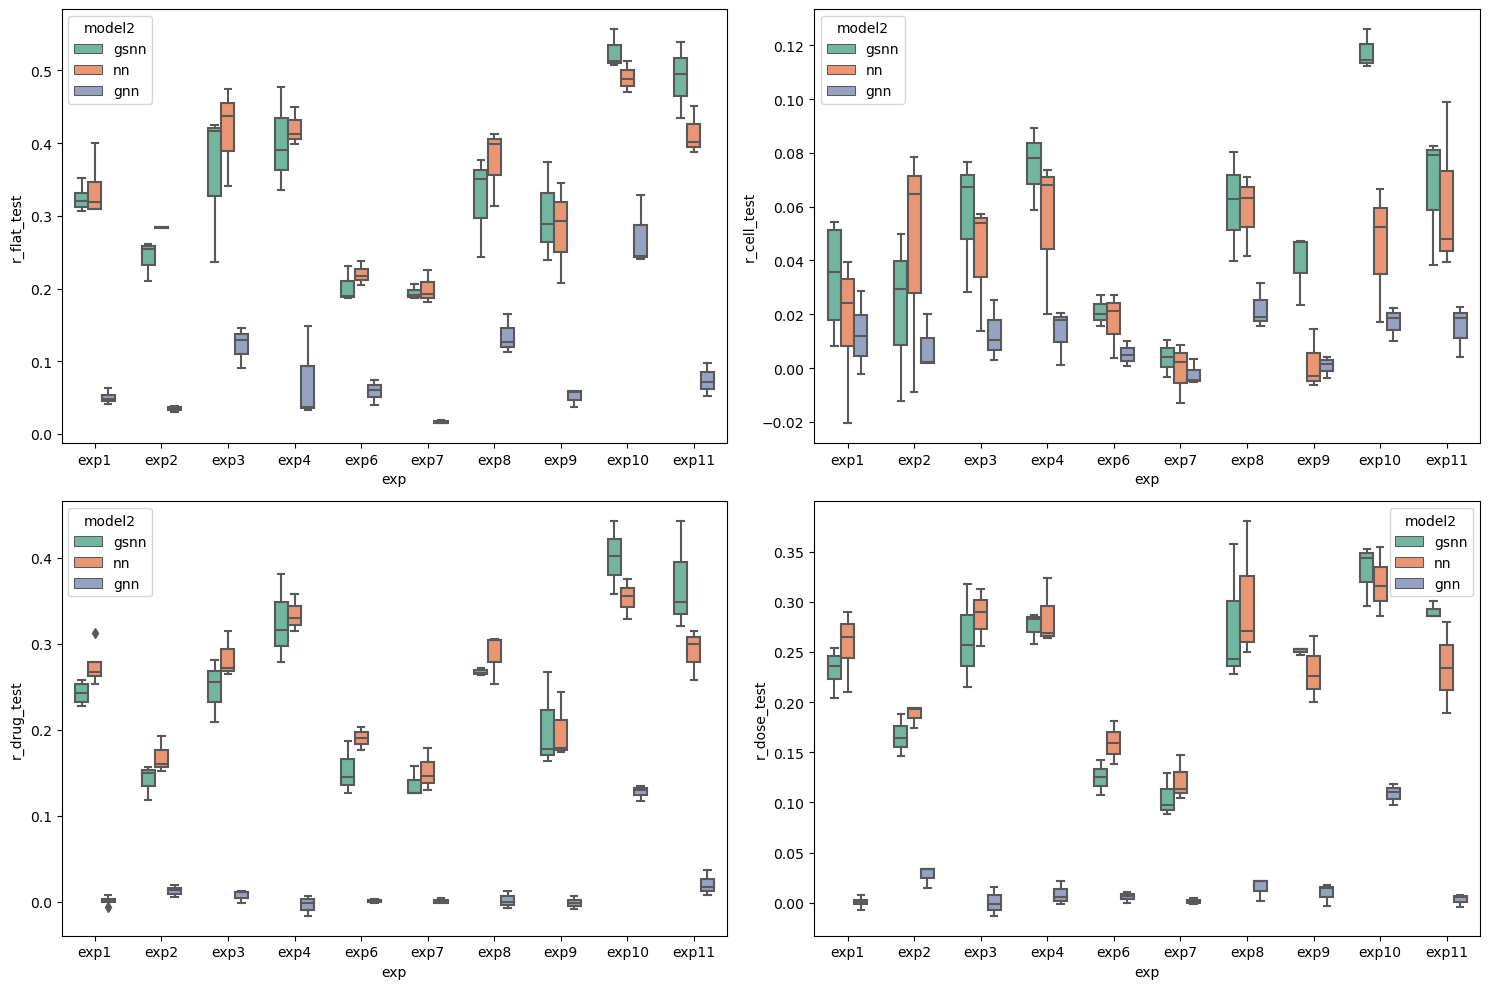

In [120]:
f,axes = plt.subplots(2,2, figsize=(15,10))
for ax, met in zip(axes.flat, ['r_flat_test', 'r_cell_test', 'r_drug_test', 'r_dose_test']):
    sbn.boxplot(x='exp', y=met, hue='model2', data=bres[lambda x: (x.cell_agnostic.values == 0) & (x.randomize.values == 0.)], order=order, width=0.6, orient='v', palette=sbn.color_palette("Set2"), ax=ax)
plt.tight_layout()
plt.show()

# GSNN vs Randomized-GSNN

In [121]:
diffs = []
perc_diffs = []

f=0
for i,row in res[lambda x: (x.model == 'gsnn')][['layers', 'dropout', 'lr', 'channels', 'eval_at_epoch', 'EXP_ID']].drop_duplicates().iterrows(): 

    temp = res[lambda x: (x.layers == row.layers) & (x.dropout == row.dropout) & (x.lr == row.lr) & (x.channels == row.channels) & (x.EXP_ID == row.EXP_ID) & (x.eval_at_epoch == row.eval_at_epoch)]
    
    try: 
        tru = temp[lambda x: x.randomize == 0.]['r_flat_test'].item()
        ran = temp[lambda x: x.randomize == 1.]['r_flat_test'].item()
        diff = tru-ran 
        diffs.append(diff)
        perc_diff = (tru - diff)/diff
        perc_diffs.append(perc_diff)
    except:
        f+=1
        print(f'failed [n={f}]', end='\r')

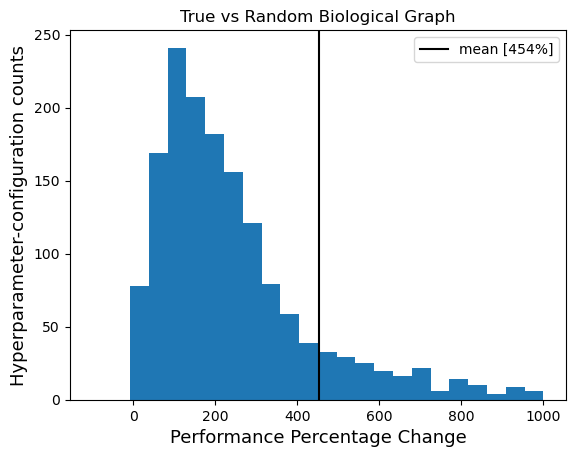

In [122]:
plt.figure()
plt.hist(100*np.array(perc_diffs), bins=np.linspace(-100,1000, 25), density=False)
plt.axvline(np.mean(100*np.array(perc_diffs)), label=f'mean [{100*np.mean(perc_diffs):.0f}%]', c='k')
plt.xlabel('Performance Percentage Change', fontsize=fontsize)
plt.ylabel('Hyperparameter-configuration counts', fontsize=fontsize)
plt.title('True vs Random Biological Graph')
plt.legend()
plt.show()

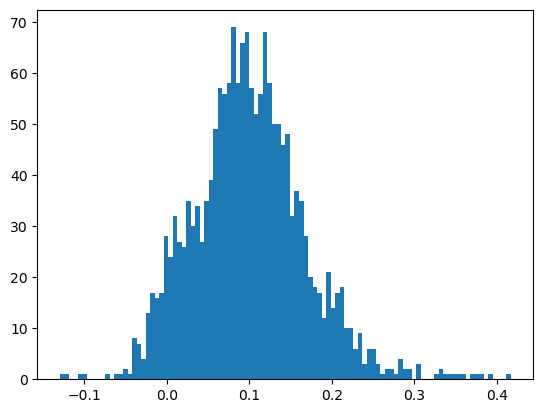

In [123]:
plt.figure()
plt.hist(diffs, bins=100)
plt.show()

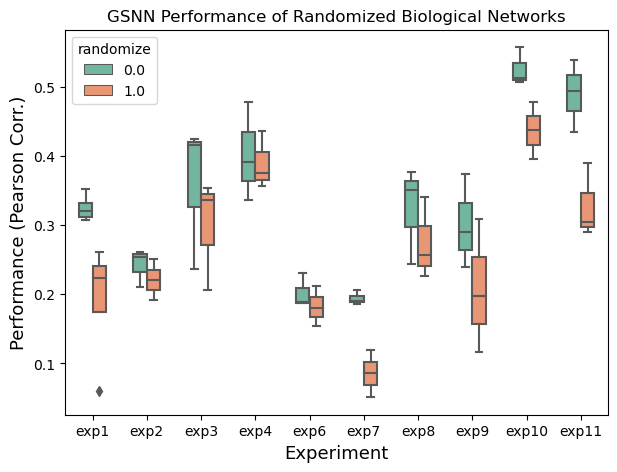

In [124]:
plt.figure(figsize=(7,5))
g = sbn.boxplot(x='exp', y='r_flat_test', hue='randomize', data=bres[lambda x: (x.cell_agnostic.values == 0) & (x.model == 'gsnn')], order=order, width=0.5, orient='v', palette=sbn.color_palette("Set2"))
plt.xlabel('Experiment', fontsize=fontsize)
plt.ylabel('Performance (Pearson Corr.)', fontsize=fontsize)
plt.title('GSNN Performance of Randomized Biological Networks')
plt.show()

# `cell-agnostic` NN cell-cell performance 

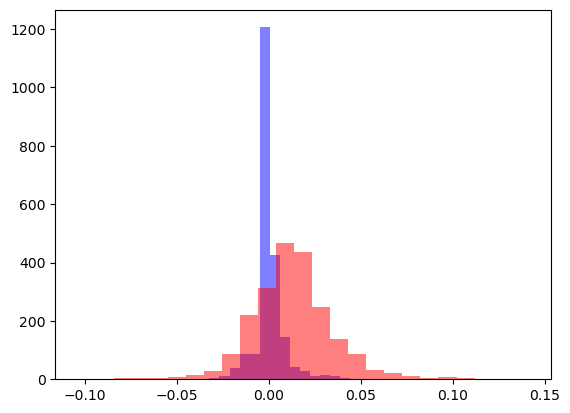

In [125]:
plt.figure()
plt.hist(res[lambda x: (x.model == 'nn') & (x.cell_agnostic == 1.)].r_cell_val, bins=25, color='b', alpha=0.5)
plt.hist(res[lambda x: (x.model == 'nn') & (x.cell_agnostic == 0.)].r_cell_val, bins=25, color='r', alpha=0.5)
plt.show()

# GSNN - what hyper-parameters work best?

In [191]:
bgsnn = bres[lambda x: (x.model == 'gsnn') & (x.randomize == 0.)]

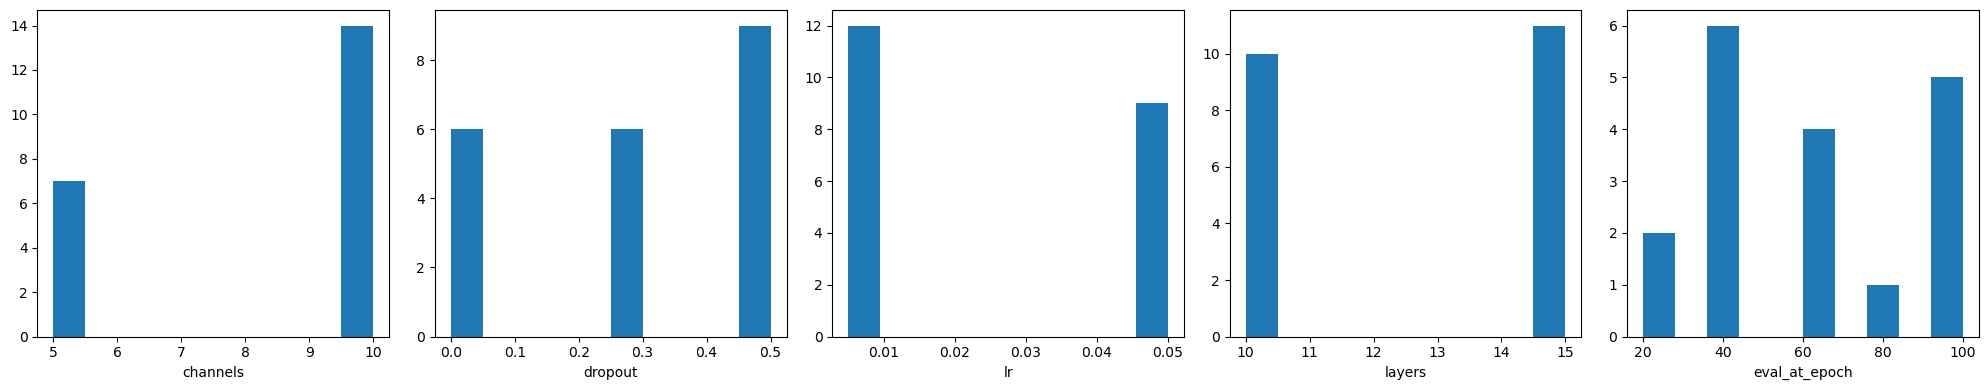

In [192]:
f, axes = plt.subplots(1,5, figsize=(5*4,4))

for ax, hp in zip(axes.flat, ['channels', 'dropout', 'lr', 'layers', 'eval_at_epoch']): 
    ax.hist(bgsnn[hp])
    ax.set_xlabel(hp)

plt.tight_layout()
plt.show()

# GSNN vs NN vs GNN (all hyper-parameter runs)

/home/teddy/miniconda3/envs/grcp/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/teddy/miniconda3/envs/grcp/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/home/teddy/miniconda3/envs/grcp/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/teddy/miniconda3/envs/grcp/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/home/teddy/miniconda3/envs/grcp/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/teddy/miniconda3/envs/grcp/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = fun

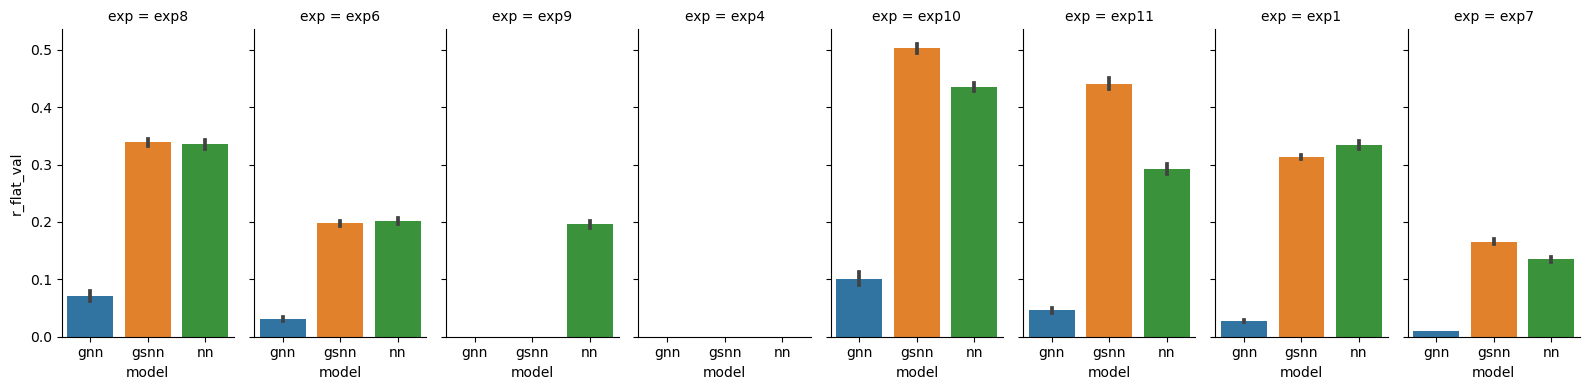

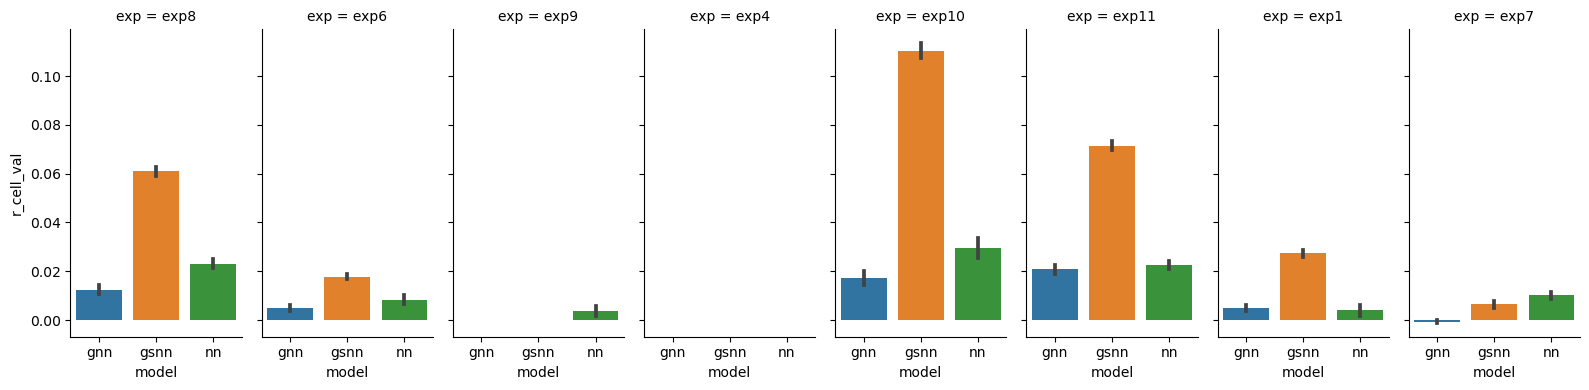

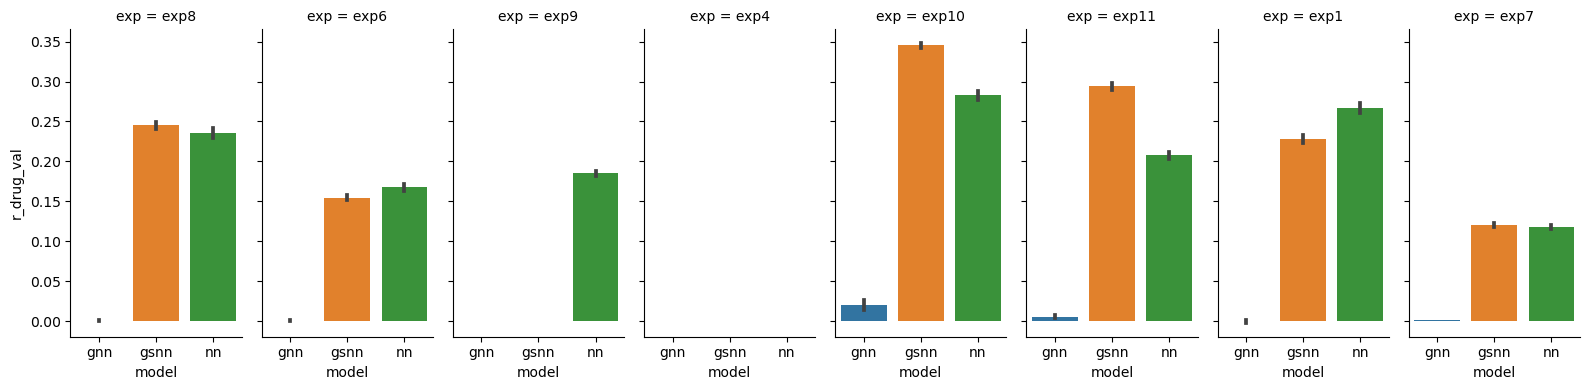

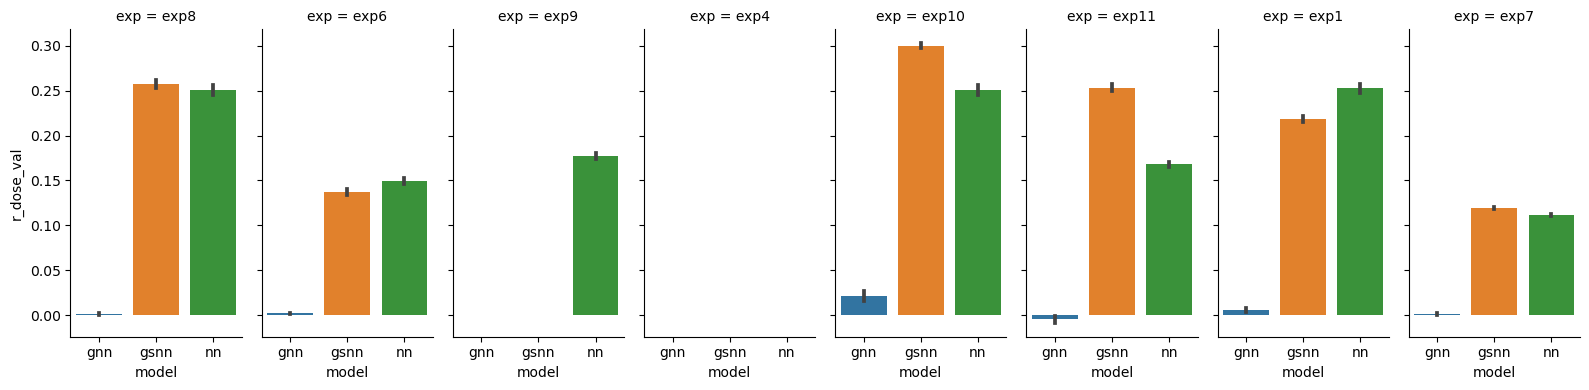

In [193]:
for i,metric in enumerate(['r_flat_val', 'r_cell_val', 'r_drug_val', 'r_dose_val']): 
    sbn.catplot(
        data=res[lambda x: (x.cell_agnostic.values == 0) & (x.randomize.values == 0)], x="model", y=metric, col="exp",
        kind="bar", height=4, aspect=.5)


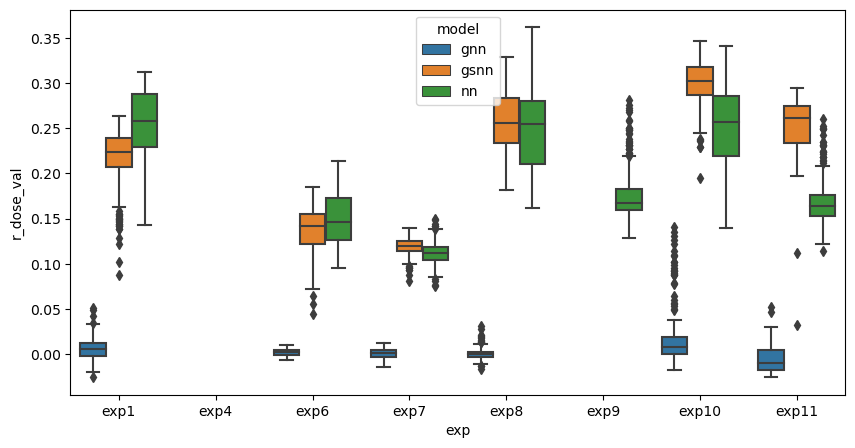

In [195]:
plt.figure(figsize=(10,5))
g = sbn.boxplot(x='exp', y=metric, hue='model', data=res[lambda x: (x.cell_agnostic.values == 0) & (x.randomize.values == 0)], order=order)
plt.show()